# **Import Library Packages**

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load Dataset to Notebook

In [3]:
# Load the data from kaggle
od.download('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/creditcard.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading creditcardfraud.zip to ./creditcardfraud


100%|██████████| 66.0M/66.0M [00:03<00:00, 18.5MB/s]


In [4]:
# import the dataset to the notebook
df = pd.read_csv('./creditcardfraud/creditcard.csv') 

# Explanatory Data AnaLysis

In [5]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()  #checking for missing or null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
df.describe().T # The values of the features correspond to a PCA 

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


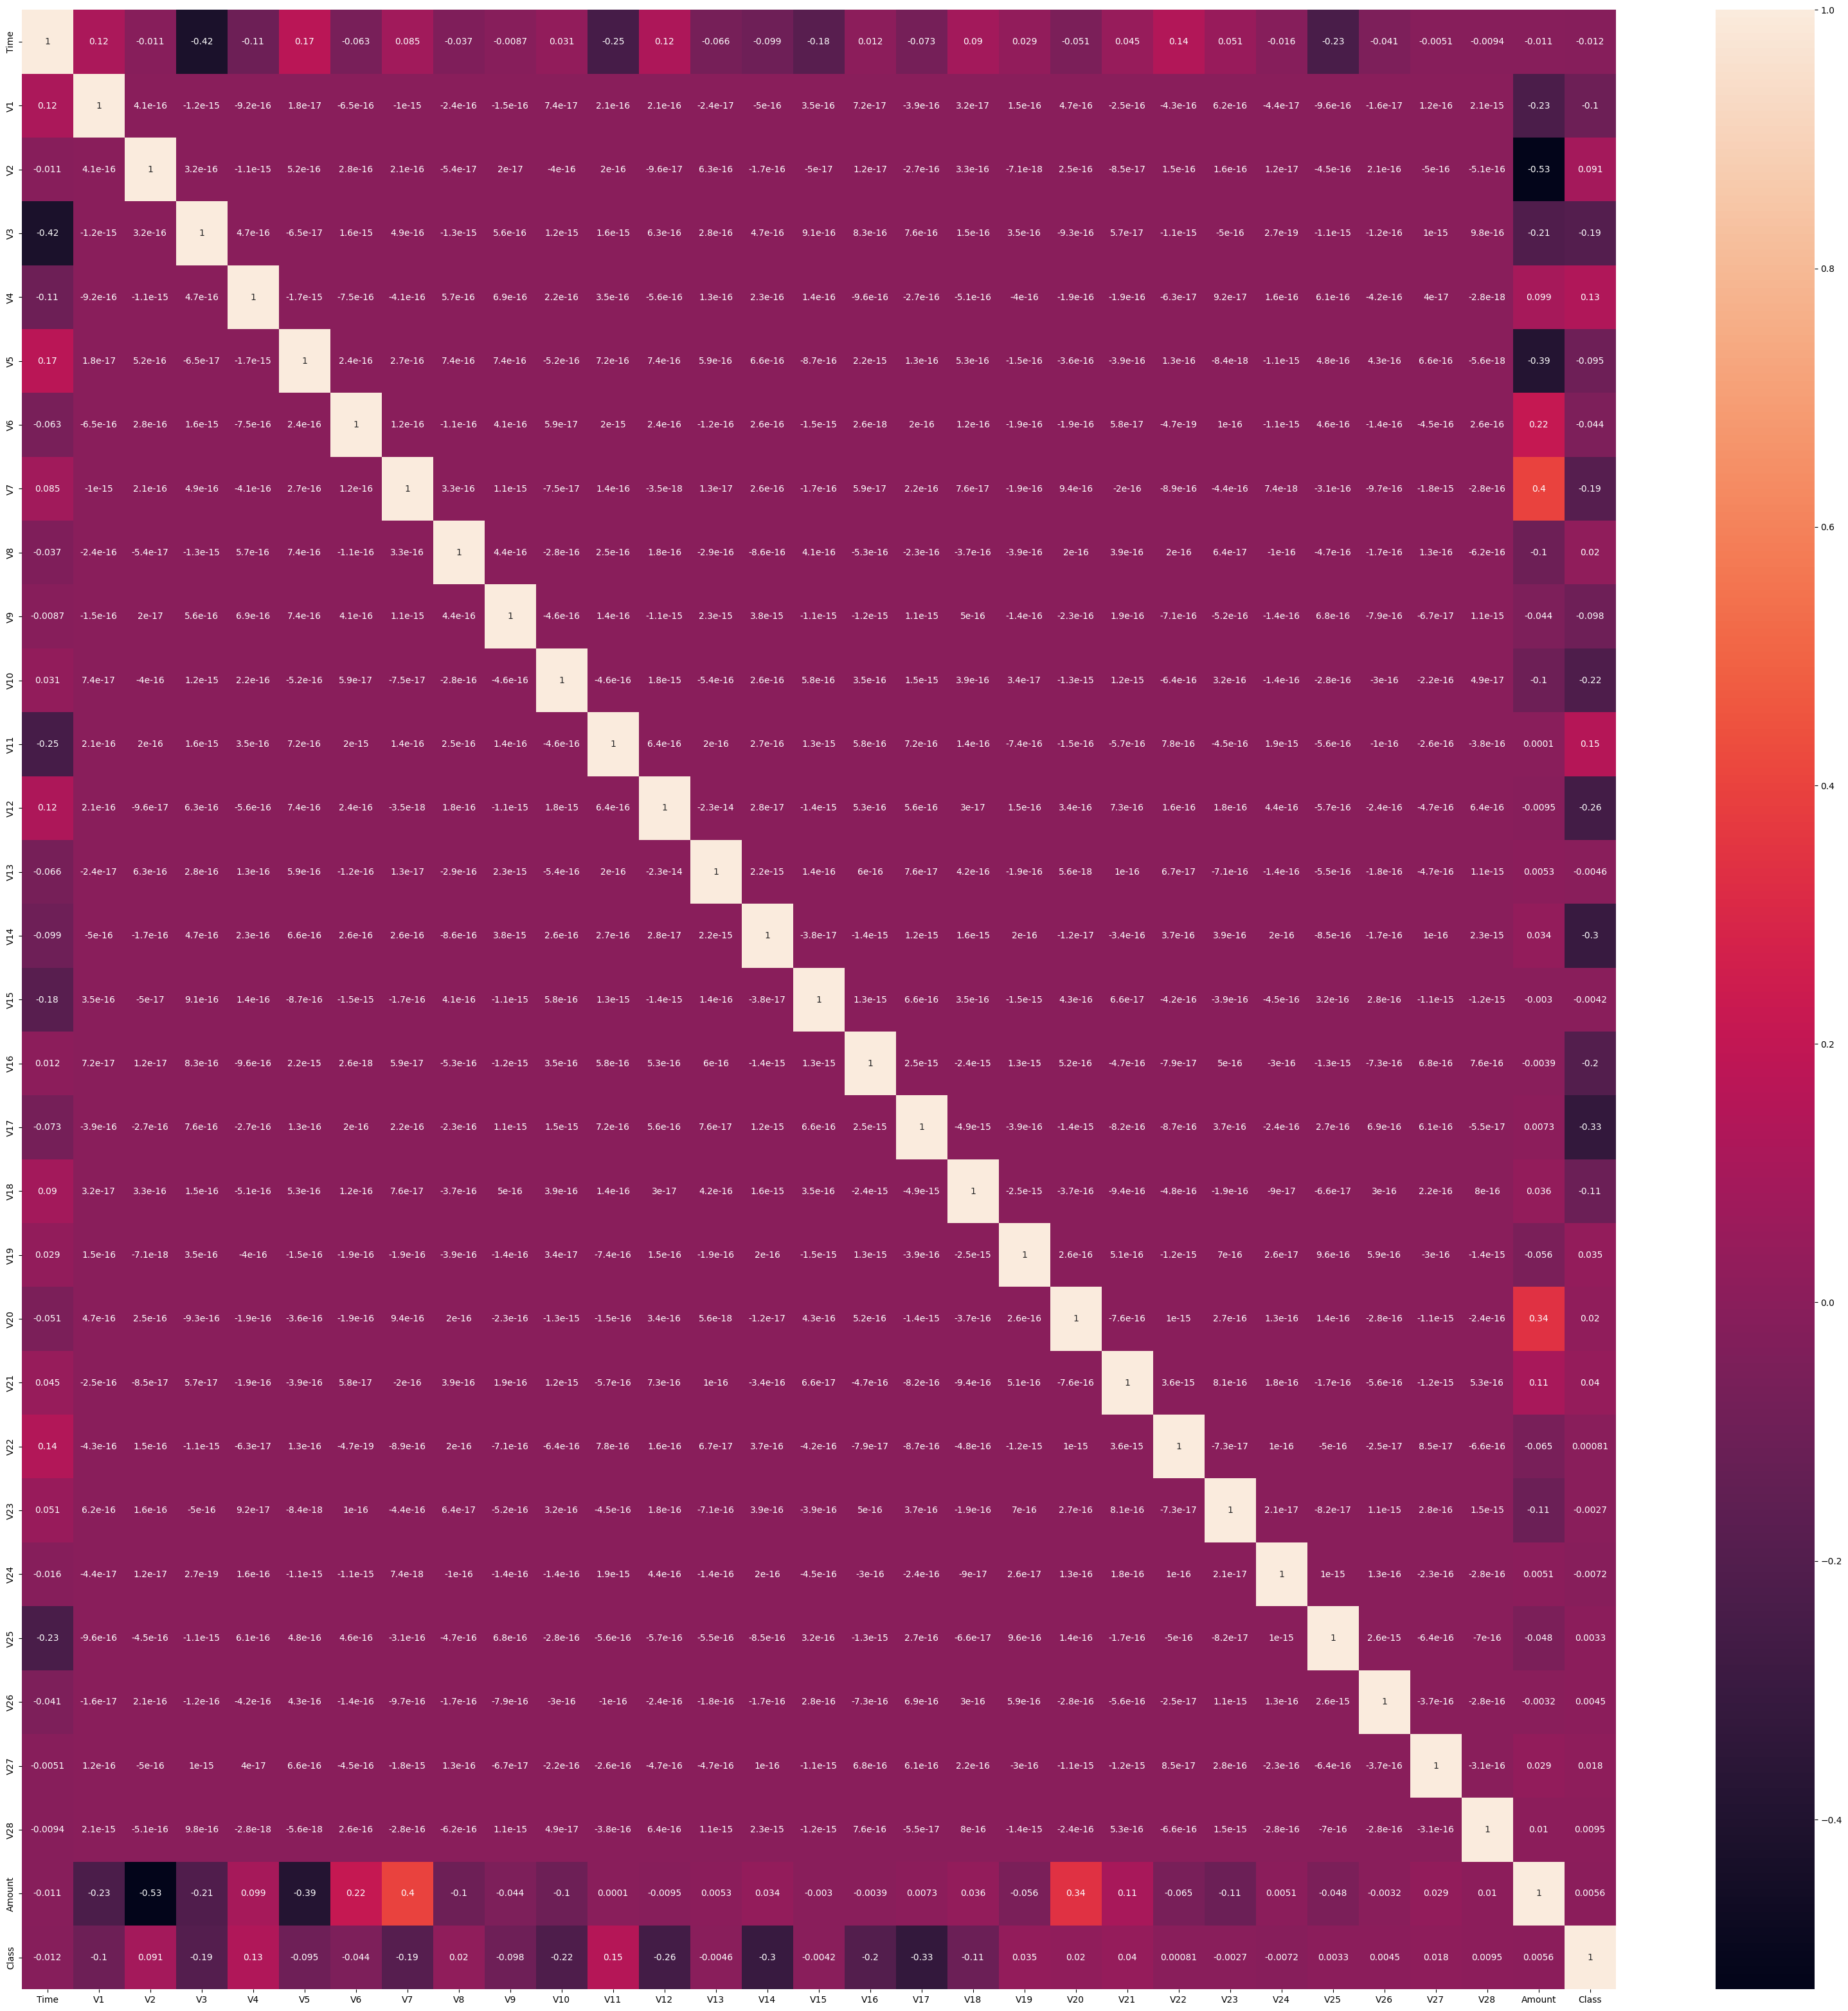

In [43]:
# showing the correlation between the features using a heatmap
#df.style.background_gradient(axis=0)
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True);

# Data Visualization

array([[<AxesSubplot: title={'center': 'Time'}>,
        <AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>,
        <AxesSubplot: title={'center': 'V4'}>,
        <AxesSubplot: title={'center': 'V5'}>],
       [<AxesSubplot: title={'center': 'V6'}>,
        <AxesSubplot: title={'center': 'V7'}>,
        <AxesSubplot: title={'center': 'V8'}>,
        <AxesSubplot: title={'center': 'V9'}>,
        <AxesSubplot: title={'center': 'V10'}>,
        <AxesSubplot: title={'center': 'V11'}>],
       [<AxesSubplot: title={'center': 'V12'}>,
        <AxesSubplot: title={'center': 'V13'}>,
        <AxesSubplot: title={'center': 'V14'}>,
        <AxesSubplot: title={'center': 'V15'}>,
        <AxesSubplot: title={'center': 'V16'}>,
        <AxesSubplot: title={'center': 'V17'}>],
       [<AxesSubplot: title={'center': 'V18'}>,
        <AxesSubplot: title={'center': 'V19'}>,
        <AxesSubplot: title={'center': 'V20'}

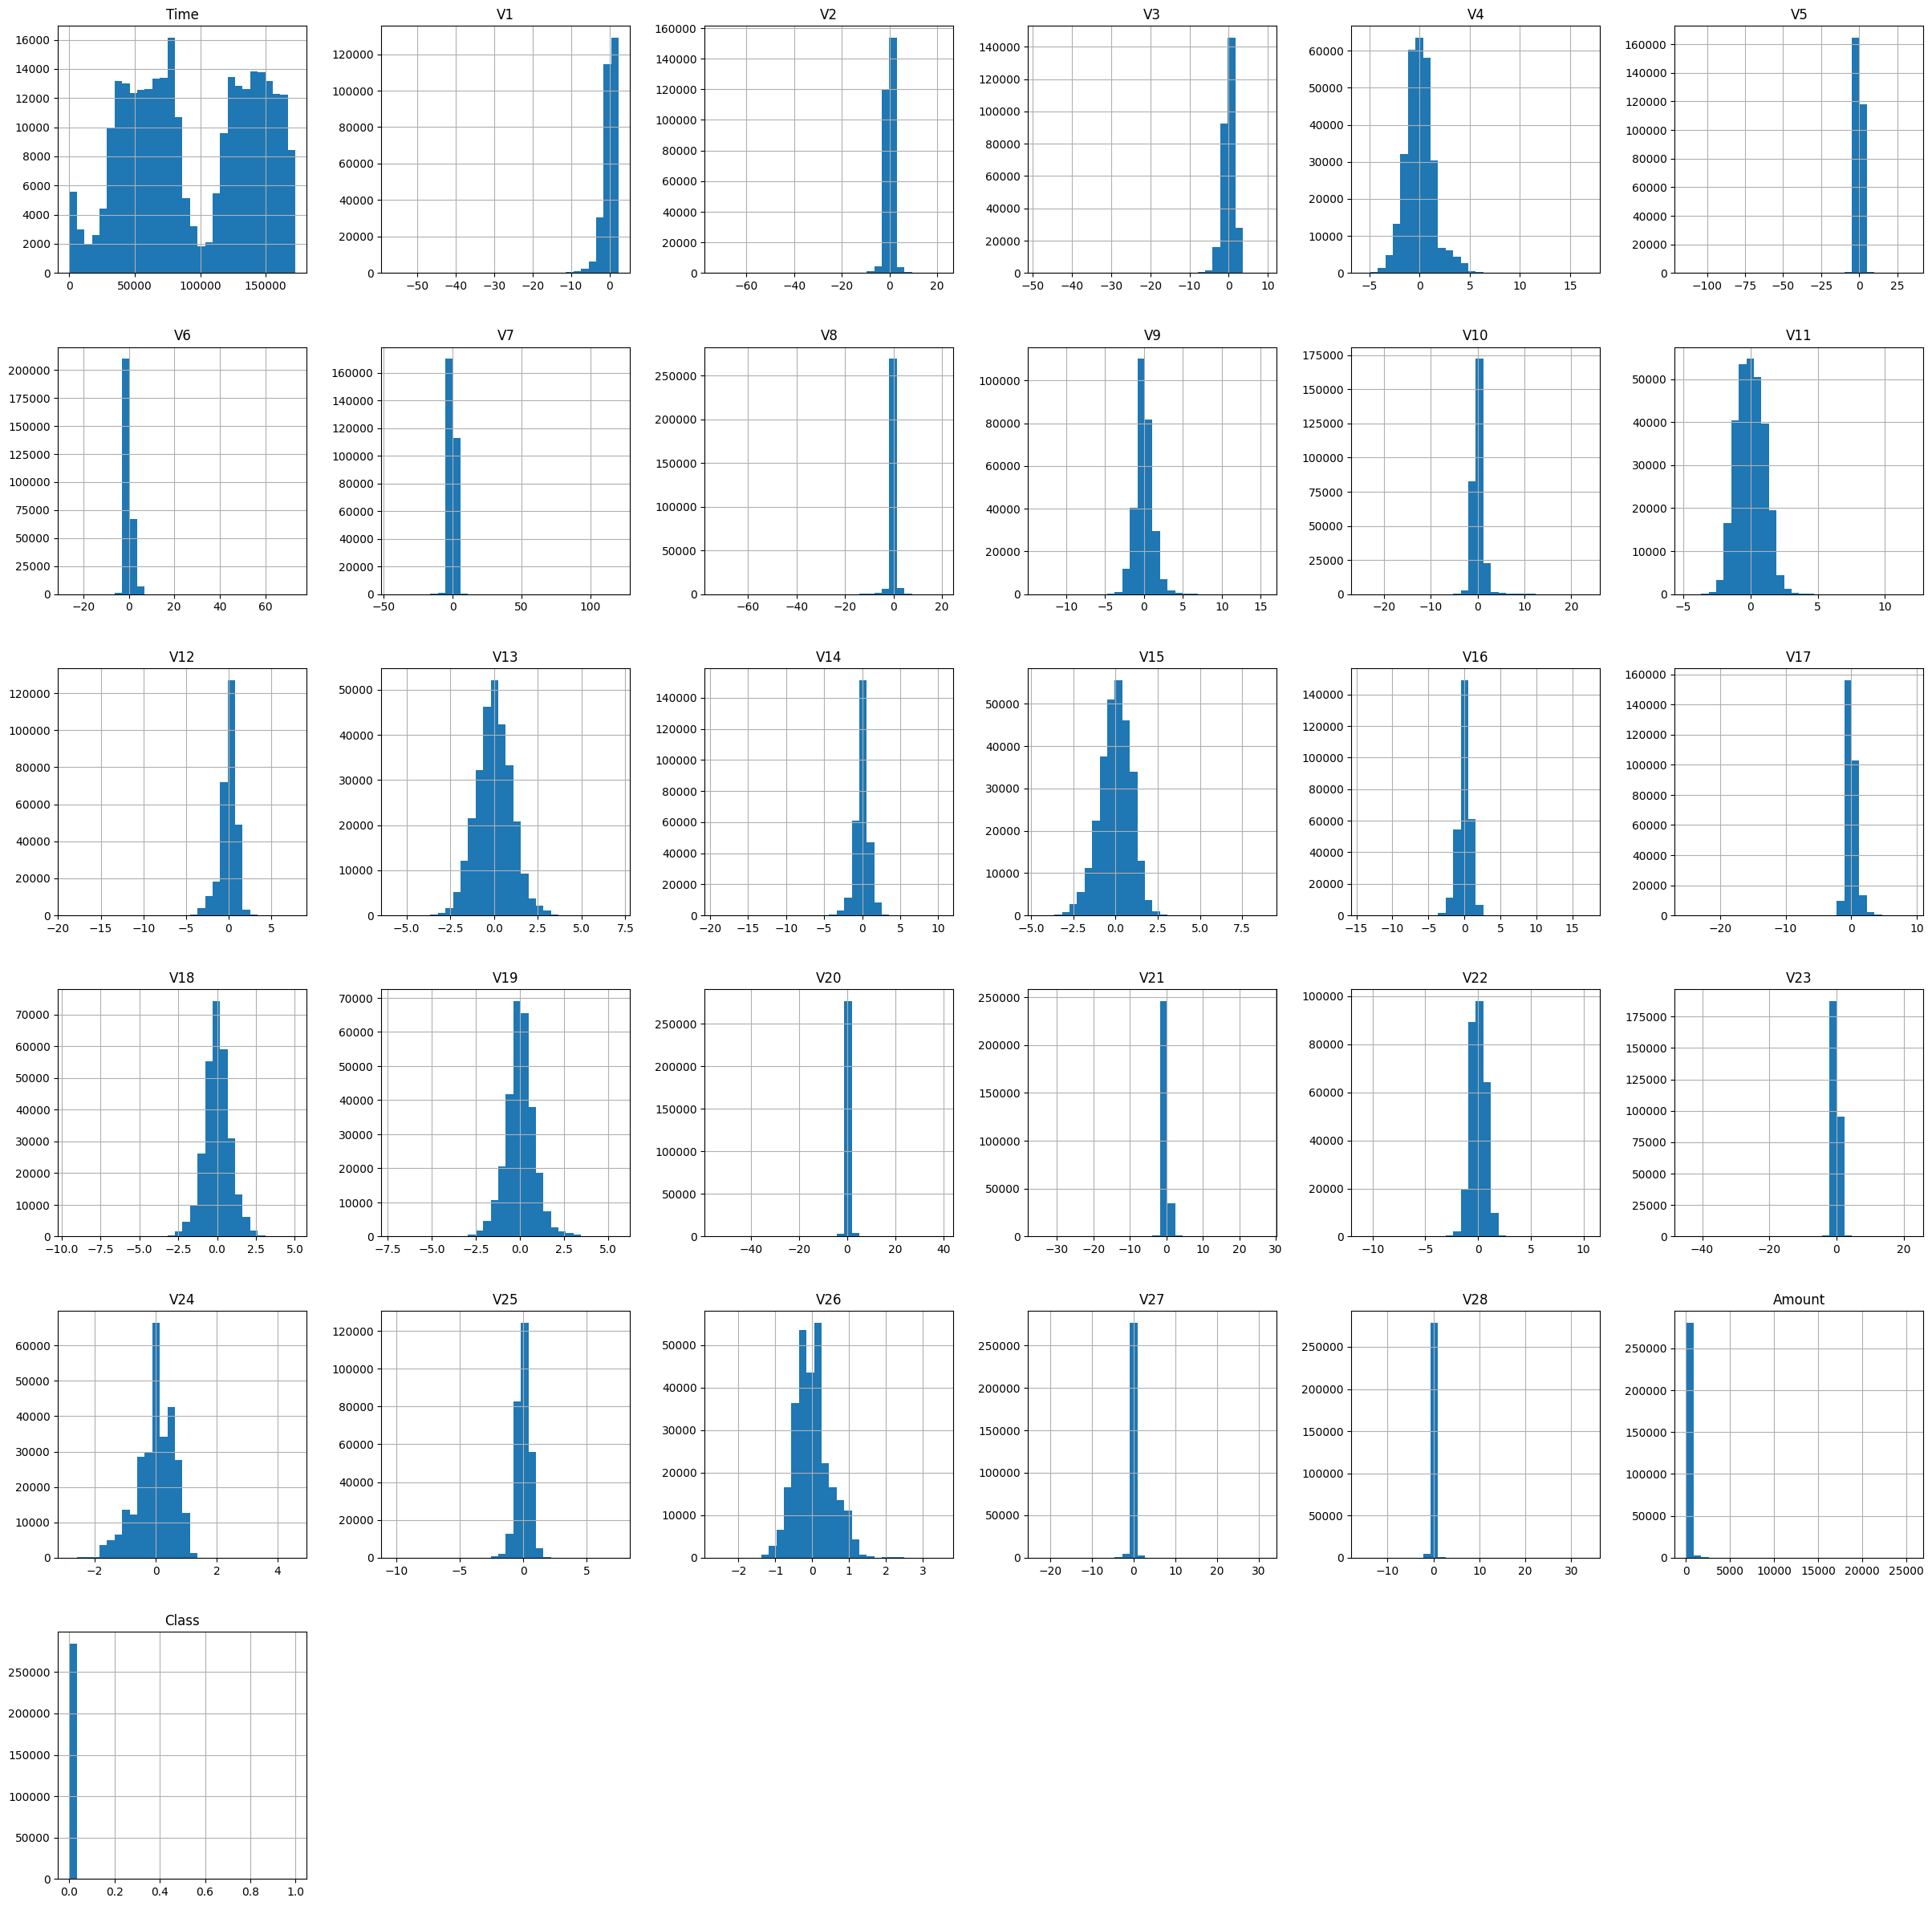

In [11]:
df.hist(bins=30, figsize=(30, 30))

In [25]:
# Count of Fraud vs Legitimate transactions
df.value_counts("Class")

Class
0    284315
1       492
dtype: int64

# Upsample the fraud classification

In [93]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns='Class')
y = df['Class']

# su = SMOTE(random_state=42)
# X_su, y_su = su.fit_resample(X, y)

from sklearn.utils import resample
positive_class = df[df['Class']==1]
negative_class = df[df['Class']==0]

us_positive_class = resample(positive_class,
             replace=True,
             n_samples=len(negative_class),
             random_state=42)

df2 = pd.concat([negative_class, us_positive_class])

In [94]:
# print(df2.value_counts())

# y_su.groupby('Class').size().plot(kind='pie',
#                                        y = y_su,
#                                        label = "Fraud_Type",
#                                        autopct='%1.1f%%')

Time      V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207.0   -13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1        3515
94362.0   -26.457745   16.497472  -30.177317   8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.9665

# Model All Classification Algorithm

## Create a Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# logreg = LogisticRegression(C=100000, fit_intercept=False)

# logreg = LogisticRegression(C=1000000)

In [95]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)  # Separate the training to test data


**Interpretation of the Coefficient** <br>
An increase by 1 unit of the specific feature will have a (positive or negative) impact on the fraud status.

In [96]:
# Generate the Logistic Regression Model
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

print('coef', model.coef_) 
print('intercept', model.intercept_) 


coef [[-2.79325461e-05  2.02911292e-01  2.08620281e-03 -5.86669815e-01
   7.06941830e-01  2.13362840e-01 -2.01001868e-01 -1.46680552e-01
  -1.18003453e-01 -2.20174644e-01 -3.60297368e-01  2.03443954e-01
  -4.84929696e-01 -1.30433411e-01 -8.02535204e-01 -1.30589897e-01
  -2.27080657e-01 -2.86503601e-01 -1.68622312e-02 -3.15831215e-02
   3.83103738e-03  7.49951250e-02  8.67387658e-02 -5.21126912e-02
  -9.72560674e-03 -4.68173681e-02 -3.18006977e-02  1.73003726e-02
   1.51520652e-02  8.35201941e-04]]
intercept [-0.18512907]


In [97]:
# Appply the model to the test data
logreg_pred = logreg.predict(X_test)

# Determine Accuracy
logreg_train = logreg.score(X_train,y_train)
logregr_test = logreg.score(X_test, y_test)

print("Accuracy of the Logistic Regression")
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_cmat = confusion_matrix(y_test, logreg_pred)
logrep_crep = classification_report(y_test, logreg_pred)

print(f'Accuracy of Logistic Regression Model: {logreg_acc}\n {logreg_cmat} \n {logrep_crep}')

Accuracy of the Logistic Regression
Accuracy of Logistic Regression Model: 0.9370856268575348
 [[54719  2027]
 [ 5128 51852]] 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     56746
           1       0.96      0.91      0.94     56980

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



## Create a K-Neighbor Classification Model

In [98]:
from sklearn.neighbors import KNeighborsClassifier 

In [99]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Predit using knn
knn_pred = knn.predict(X_test)

# Determine the Accuracy of the KNN Model
knn_acc = accuracy_score(y_test, knn_pred)
knn_cmat = confusion_matrix(y_test, knn_pred)
knn_crep = classification_report(y_test, knn_pred)

print(f"Accuracy of the K-Neighbors Classifiers Model: {knn_acc} \n{knn_cmat} \n{knn_crep}")

Accuracy of the K-Neighbors Classifiers Model: 0.9990239698925487 
[[56635   111]
 [    0 56980]] 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56746
           1       1.00      1.00      1.00     56980

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



## Create a Gaussian Native Bayes Model

In [100]:
from sklearn.naive_bayes import GaussianNB

In [69]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Prediction Using GaussianNB
GNB_pred = GNB.predict(X_test)

# Determine the Accuracy of the GNB Model
GNB_acc = accuracy_score(y_test, GNB_pred)
GNB_cmat = confusion_matrix(y_test, GNB_pred)
GNB_crep = classification_report(y_test, GNB_pred)

print(f"Accuracy of the Gaussian Naive Bayes Model: {GNB_acc} \n{GNB_cmat} \n{GNB_crep}")

Accuracy of the Gaussian Naive Bayes Model: 0.9930128857835048 
[[56502   362]
 [   36    62]] 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962



## Create a Bernouilli Native Bayes Model

In [101]:
from sklearn.naive_bayes import BernoulliNB

In [102]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

# Predict using Bernoulli Native Bayes
BNB_pred = BNB.predict(X_test)

# Determine the Accuracy of the BernoulliNB 
BNB_acc = accuracy_score(y_test, BNB_pred)
BNB_cmat = confusion_matrix(y_test, BNB_pred)
BNB_crep = classification_report(y_test, BNB_pred)

print(f"Accuracy of the Gaussian Naive Bayes Model: {BNB_acc} \n{BNB_cmat} \n{BNB_crep}")

Accuracy of the Gaussian Naive Bayes Model: 0.9059581801874681 
[[56312   434]
 [10261 46719]] 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     56746
           1       0.99      0.82      0.90     56980

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



## Create a Decision Tree Classifier Model

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Prediction using Decision Tree Classifier
dt_pred = dt.predict(X_test)

# Determine the Accuracy of the Decision Tree Classifier

dt_acc = accuracy_score(y_test, dt_pred)
dt_cmat = confusion_matrix(y_test, dt_pred)
dt_crep = classification_report(y_test, dt_pred)

print(f"Accuracy of the Decision Tree Model: {dt_acc} \n{dt_cmat} \n{dt_crep}")

Accuracy of the Decision Tree Model: 0.9997098288869739 
[[56713    33]
 [    0 56980]] 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56746
           1       1.00      1.00      1.00     56980

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



## Create a Support Vector Machine Model

In [105]:
from sklearn.svm import SVC

In [106]:
svc = SVC()
svc.fit(X_train, y_train)

# Prediction using SVC
svc_pred = svc.predict(X_test)

# Determine the Accuracy of the SVC

svc_acc = accuracy_score(y_test, svc_pred)
svc_cmat = confusion_matrix(y_test, svc_pred)
svc_crep = classification_report(y_test, svc_pred)

print(f"Accuracy of the SVC Model: {svc_acc} \n{svc_cmat} \n{svc_crep}")

: 

## Create a Random Forest Classifier Model

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Prediction using Decision Tree Classifier
rfc_pred = rfc.predict(X_test)

# Determine the Accuracy of the Decision Tree Classifier

rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_cmat = confusion_matrix(y_test, rfc_pred)
rfc_crep = classification_report(y_test, rfc_pred)

print(f"Accuracy of the Decision Tree Model: {rfc_acc} \n{rfc_cmat} \n{rfc_crep}")

NameError: name 'X_train' is not defined

## Create a XGBoost Model

**Explanation** <br>
We are having some issues installing the XGBoost library.  I will have to figure out a way to add it.<br>
In the meantime we will compare the models to determine the best option.

# Models Comparison

In [88]:
precision = []
recall = []
f1_score = []

lst = ['logreg','BNB','knn', 'GNB']
for item in lst:
    precision.append(item_crep[precision])
    recall

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3490011203.py, line 7)